<a href="https://colab.research.google.com/github/Shaunak-Mukherjee/ECE-58000-Optimization-Methods-for-Systems-And-Control/blob/Optimization-Algorithms/Particle_Swarm_Optimization_Example1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

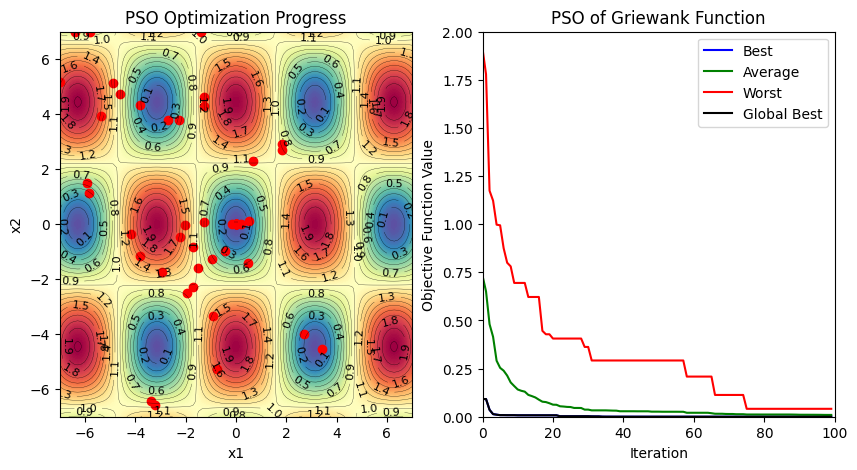

In [ ]:
# Import all libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import seaborn as sns

# Define the objective function
def objective_function(x1, x2):
    return 1 + x1**2 / 4000 + x2**2 / 4000 - np.cos(x1) * np.cos(x2 / np.sqrt(2))

# PSO parameters
num_particles = 50          # Size of swarm
i_max_iter = 100            # Max number of iterations
inertia_w = 0.5             # Inertial constant < 1.0
cognitive_c1 = 2.0          # Cognitive constant, usually 2.0
social_c2 = 2.0             # Social constant, usually 2.0

# Range for x1 and x2
x1_range = np.linspace(-7, 7, 100)
x2_range = np.linspace(-7, 7, 100)

# Initialize particle positions and velocities
positions = np.random.uniform(-7, 7, (num_particles, 2))
velocities = np.random.uniform(-1, 1, (num_particles, 2))
personal_best_positions = np.copy(positions)
personal_best_values = objective_function(positions[:, 0], positions[:, 1])
global_best_position = personal_best_positions[np.argmin(personal_best_values)]
global_best_value = np.min(personal_best_values)

# Empty arrays to store best, average, and worst objective function values
best_values = []
average_values = []
worst_values = []
global_best_values = []

# Prepare plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Contour plot with level sets
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
f_values = objective_function(x1_grid, x2_grid)
contour = ax1.contourf(x1_grid, x2_grid, f_values, levels=np.arange(f_values.min(), f_values.max(), 0.01), cmap='Spectral_r')

# Add contour lines with specific styling
contour_lines = ax1.contour(x1_grid, x2_grid, f_values, levels=np.arange(f_values.min(), f_values.max(), 0.1), colors='k', linewidths=0.2, linestyles='-')
ax1.clabel(contour_lines, inline=True, fontsize=8, fmt='%0.1f')
scat = ax1.scatter(positions[:, 0], positions[:, 1], color='r')

ax1.set_xlim(-7, 7)
ax1.set_ylim(-7, 7)
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_title('PSO Optimization Progress')
ax1.grid(False)


# Best, average, and worst values plot
line_best, = ax2.plot([], [], label='Best', color='blue')
line_avg, = ax2.plot([], [], label='Average', color='green')
line_worst, = ax2.plot([], [], label='Worst', color='red')
line_global_best, = ax2.plot([], [], label='Global Best', color='black')
ax2.legend()
ax2.set_xlim(0, i_max_iter)
ax2.set_ylim(0, 2)  # Adjust based on function values
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Objective Function Value')
ax2.set_title('PSO of Griewank Function')


def pso(frame):
    global positions, velocities, personal_best_positions, personal_best_values, global_best_position, global_best_value

    r1 = np.random.random((num_particles, 2))
    r2 = np.random.random((num_particles, 2))

    # Update velocities and positions
    velocities = (inertia_w * velocities +
                  cognitive_c1 * r1 * (personal_best_positions - positions) +
                  social_c2 * r2 * (global_best_position - positions))
    positions += velocities

    # Apply correction factor to keep particles within bounds
    positions[:, 0] = np.clip(positions[:, 0], x1_range.min(), x1_range.max())
    positions[:, 1] = np.clip(positions[:, 1], x2_range.min(), x2_range.max())

    # Update personal bests
    current_values = objective_function(positions[:, 0], positions[:, 1])
    mask = current_values < personal_best_values
    personal_best_positions[mask] = positions[mask]
    personal_best_values[mask] = current_values[mask]

    # Update global best
    if np.min(personal_best_values) < global_best_value:
        global_best_value = np.min(personal_best_values)
        global_best_position = personal_best_positions[np.argmin(personal_best_values)]

    # Collect values for plotting
    best_values.append(np.min(personal_best_values))
    average_values.append(np.mean(personal_best_values))
    worst_values.append(np.max(personal_best_values))
    global_best_values.append(global_best_value)

    # Update the scatter plot
    scat.set_offsets(positions)

    # Update best, average, and worst plot
    line_best.set_data(range(frame+1), best_values[:frame+1])
    line_avg.set_data(range(frame+1), average_values[:frame+1])
    line_worst.set_data(range(frame+1), worst_values[:frame+1])
    line_global_best.set_data(range(frame+1), global_best_values[:frame+1])

    return scat, line_best, line_avg, line_worst, line_global_best

# Create the animation
anim = FuncAnimation(fig, pso, frames=i_max_iter, blit=True)

# To display the animation in Colab
HTML(anim.to_html5_video())

In [ ]:
print(f"Best Value: {global_best_value:.1f}")
print(f"Best Position: {global_best_position[0]:.1f}, {global_best_position[1]:.1f}")

Best Value: 0.0
Best Position: -0.0, 0.0
